In [32]:
import seisbench.data as sbd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


In [33]:
metadatos = pd.read_csv("/Users/lamb/.seisbench/datasets/txed/metadata.csv")

In [34]:
metadatos.rename(columns={'id': 'ID_poligono'},inplace=True)

In [35]:
metadatos.shape

(975, 24)

In [36]:
metadatos.dropna(inplace=True)
metadatos.shape

(975, 24)

In [28]:
metadatos.tail()

,trace_coda_end_sample,source_depth_km,source_latitude_deg,source_longitude_deg,source_magnitude,source_origin_time,trace_p_arrival_sample,trace_p_arrival_time,trace_p_arrival_uncertainty_s,trace_s_arrival_sample,...,station_latitude_deg,station_longitude_deg,station_code,trace_category,trace_name_original,split,trace_name,trace_causal,trace_polarity,ID_poligono
1000,1631.0,5.745947,31.516766,-103.414869,1.912946,2021-08-21 08:18:08,849.0,2021-08-21 08:18:11,0.2,1240.0,...,31.408922,-103.510147,PCOS,earthquake_local,texnet2021qind_PCOS_EV,test,"bucket384$24,:3,:6000",unknown,unknown,0.0
1001,1107.0,7.442676,31.537432,-103.401399,2.407002,2021-08-31 11:57:14,461.0,2021-08-31 11:57:17,0.2,784.0,...,31.408922,-103.510147,PCOS,earthquake_local,texnet2021rbbk_PCOS_EV,train,"bucket383$833,:3,:6000",unknown,unknown,0.0
1002,1289.0,3.920679,31.375737,-103.308035,2.188346,2021-09-03 13:00:41,547.0,2021-09-03 13:00:45,0.3,918.0,...,31.408922,-103.510147,PCOS,earthquake_local,texnet2021rgqa_PCOS_EV,test,"bucket384$949,:3,:6000",unknown,unknown,0.0
1003,1560.0,18.985571,31.435843,-103.261160,2.047352,2022-10-12 09:07:26,718.0,2022-10-12 09:07:31,0.2,1139.0,...,31.408922,-103.510147,PCOS,earthquake_local,texnet2022tzox_PCOS_EV,train,"bucket426$611,:3,:6000",unknown,unknown,0.0
1004,1038.0,6.851392,31.443924,-103.417935,1.855234,2023-02-15 20:29:57,440.0,2023-02-15 20:30:00,0.2,739.0,...,31.408922,-103.510147,PCOS,earthquake_local,texnet2023dfuf_PCOS_EV,train,"bucket462$278,:3,:6000",unknown,unknown,0.0


In [20]:
metadatos.columns

Index(['trace_coda_end_sample', 'source_depth_km', 'source_latitude_deg',
       'source_longitude_deg', 'source_magnitude', 'source_origin_time',
       'trace_p_arrival_sample', 'trace_p_arrival_time',
       'trace_p_arrival_uncertainty_s', 'trace_s_arrival_sample',
       'trace_s_arrival_time', 'trace_s_arrival_uncertainty_s', 'trace_snr_db',
       'station_elevation_m', 'station_latitude_deg', 'station_longitude_deg',
       'station_code', 'trace_category', 'trace_name_original', 'split',
       'trace_name', 'trace_causal', 'trace_polarity', 'ID_poligono'],
      dtype='object')

In [40]:
metadatos['ID_poligono'] = metadatos['ID_poligono'].astype(int)

In [41]:
metadatos['ID_poligono'].value_counts()

ID_poligono
2    361
1    360
3    203
0     51
Name: count, dtype: int64

In [34]:
#Ubicar co una estrella/cuadrada estacion PCOS:

# Lat: 31.408922          lon: -103.510147

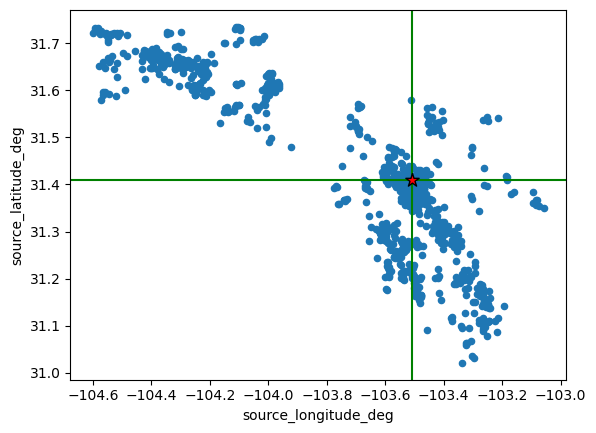

In [7]:
ax = metadatos.plot(x='source_longitude_deg',y='source_latitude_deg',kind='scatter')
ax.scatter(x=[-103.510147], y=[31.408922], color='red', s=100, edgecolor='black', marker='*', zorder=5)
ax.axvline(x=-103.510147,c='g')
ax.axhline(y=31.408922,c='g')


### Asignar las clases a los eventos

In [36]:
metadatos.loc[(metadatos['source_longitude_deg']>= -103.510147) & (metadatos['source_latitude_deg']>=31.408922),'ID_poligono'] = 0
metadatos.loc[(metadatos['source_longitude_deg']<= -103.510147) & (metadatos['source_latitude_deg']>=31.408922),'ID_poligono'] = 1
metadatos.loc[(metadatos['source_longitude_deg']<= -103.510147) & (metadatos['source_latitude_deg']<=31.408922),'ID_poligono'] = 2
metadatos.loc[(metadatos['source_longitude_deg']>= -103.510147) & (metadatos['source_latitude_deg']<=31.408922),'ID_poligono'] = 3


In [37]:
metadatos['ID_poligono'].value_counts()

ID_poligono
1    450
3    349
2    192
0     55
Name: count, dtype: int64

### Restar 1 a todas las clases

In [43]:
metadatos['ID_poligono'] = metadatos['ID_poligono']-1
metadatos['ID_poligono'].value_counts()

ID_poligono
-1    254
 3    210
 2    193
 0    139
 5    105
 4     56
 6     56
 1     33
Name: count, dtype: int64

### Cambiar proporcion de train test dev

In [29]:
metadatos.loc[metadatos['split']=='test','split'] = 'train'
metadatos['split'].value_counts()

split
train    861
dev      114
Name: count, dtype: int64

#### Cambiar numero de dev

In [30]:
indices_a_modificar = metadatos[metadatos['split'] == 'dev'].index
# Establecer la cantidad de valores a cambiar
num_cambios = 53
# Seleccionar índices al azar para cambiar
indices_aleatorios = np.random.choice(indices_a_modificar, size=num_cambios, replace=False)

# Realizar el cambio en esos índices seleccionados
metadatos.loc[indices_aleatorios, 'split'] = 'train'

metadatos['split'].value_counts()

split
train    914
dev       61
Name: count, dtype: int64

### Guardar en metadatos

In [42]:
#Solo correr una vez
metadatos.to_csv("/Users/lamb/.seisbench/datasets/txed/metadata.csv",index=False)